In [102]:
import pandas as pd
import pickle
import re
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import math

### Vocabulary Level

In [2]:
%store -r df_nation

In [3]:
#df_nation grouped by level_frequency 
# 0 -> 26 (proper_names) , 27 (marginal_words), 28 (compounds), 29 (acronyms)
# (5-25) -> levels from 5 to 15
#df_nation grouped by levels_coverage
# 15 -> (15: list between 15 and 25)

# df_nation.groupby('levels').count()
# df_nation.groupby('levels_frequency').count()
df_nation.groupby('levels_coverage').count() 
df_nation.sort_values('all_forms')

,base_forms,all_forms,levels,levels_frequency,levels_coverage
56173,a,a,1,1,1
1149,a1,a1,26,0,26
1150,a11,a11,26,0,26
1151,a168,a168,26,0,26
1152,a19,a19,26,0,26
...,...,...,...,...,...
30895,emigre,émigrés,12,5-25,12
69601,esprit,ésprit,16,5-25,15
89976,etoile,étoile,20,5-25,15
52372,etudes,étude,15,5-25,15


### Data

In [4]:
#Disney catalogue
df_disney = pd.read_csv('disney_plus_shows.csv')
df_disney = df_disney.dropna(subset=['title'])
df_disney['title'] = df_disney['title'].apply(lambda x:x.lower())
df_disney['title'] = df_disney['title'].apply(lambda x:re.sub('[^\w\s]', '', x))
df_disney['title'] = df_disney['title'].apply(lambda x:' '.join(x.split()))

df_disney = df_disney.dropna(subset=['runtime'])
df_disney['runtime'] = df_disney['runtime'].apply(lambda x:re.sub('[^\d]', '', x))
df_disney = df_disney.astype({'runtime':int}) #'year':int
df_disney.rename(columns={'title':'titles', 'year':'years'}, inplace=True)

In [5]:
#filtering out content other than movies
df_disney_movies = df_disney[df_disney['type']=='movie']
df_disney_movies = df_disney_movies[df_disney_movies['runtime']>30]

In [6]:
df_disney.groupby('type').count()

,imdb_id,titles,plot,rated,years,released_at,added_at,runtime,genre,director,writer,actors,language,country,awards,metascore,imdb_rating,imdb_votes
type,,,,,,,,,,,,,,,,,,
episode,22,22,17,10,22,21,22,22,21,18,19,21,10,9,2,0,18,18
movie,662,662,654,598,662,659,662,662,661,658,608,652,661,661,433,291,660,660
series,154,154,154,124,154,143,154,154,153,0,104,152,148,152,118,0,153,153


In [7]:
#movies dataset #note: ihave 2 movies dataset (this step can be ommited if your trnacsripts dataset is already well organized)
df_movies_1 = pickle.load(open('df_movies_clean_except_transcripts', 'rb'))
df_movies_1['titles'] = df_movies_1['titles'].apply(lambda x:x.lower())
df_movies_1['titles'] = df_movies_1['titles'].apply(lambda x:re.sub('[^\w\s]', '', x))
df_movies_1['titles'] = df_movies_1['titles'].apply(lambda x:' '.join(x.split()))

df_movies_anime = pickle.load(open('df_movies_anime', 'rb'))
df_movies_based = pickle.load(open('df_movies_based_tv', 'rb'))
df_movies_children = pickle.load(open('df_movies_children', 'rb'))
df_movies_christmas = pickle.load(open('df_movies_christmas', 'rb'))
df_movies_classic = pickle.load(open('df_movies_classic', 'rb'))
df_movies_romance = pickle.load(open('df_movies_romance', 'rb'))
df_movies_sagas = pickle.load(open('df_movies_sagas', 'rb'))
df_movies_easter = pickle.load(open('df_movies_easter', 'rb'))
df_movies_horror = pickle.load(open('df_movies_horror', 'rb'))
df_movies_superhero = pickle.load(open('df_movies_superhero', 'rb'))
df_movies_thanksgiving = pickle.load(open('df_movies_thanksgiving', 'rb'))

df_movies_2 = pd.concat(
    [df_movies_anime, df_movies_based, df_movies_children, df_movies_christmas,
     df_movies_classic, df_movies_romance, df_movies_sagas, df_movies_easter, df_movies_horror,
    df_movies_superhero, df_movies_thanksgiving]
    , ignore_index=True
)

df_movies_2['titles'] = df_movies_2['titles'].apply(lambda x:x.lower())
df_movies_2['titles'] = df_movies_2['titles'].apply(lambda x:' '.join(x.split()))
df_movies_2.drop_duplicates(keep='first', inplace=True)

In [8]:
df_movies = pd.concat([df_movies_1, df_movies_2], ignore_index=True)
df_movies = df_movies.drop_duplicates(['titles', 'years'])

In [9]:
df_disney_movies.groupby('type').count()

,imdb_id,titles,plot,rated,years,released_at,added_at,runtime,genre,director,writer,actors,language,country,awards,metascore,imdb_rating,imdb_votes
type,,,,,,,,,,,,,,,,,,
movie,545,545,540,518,545,542,545,545,544,542,534,543,544,545,408,291,544,544


In [10]:
# df_non[df_non['titles'].str.contains('the emperors new groove')]
# df_children[df_children['titles'].str.contains('the emperors new groove')]

In [11]:
df_movies_null_years = df_movies[df_movies['years'].isnull()] # df_analysis[df_analysis['years_x'] != df_analysis['years_y']]
df_1 = pd.merge(df_movies_null_years, df_disney_movies, on='titles')
df_1 = df_1.drop(['years_x'], axis=1)
df_1.rename(columns={'years_y':'years'}, inplace=True)
df_2 = pd.merge(df_disney_movies, df_movies, on=['titles', 'years'])

df_analysis = pd.concat([df_1, df_2], ignore_index=True).sort_values(by=['imdb_rating'], ascending=False)
df_analysis

,titles,plots,transcripts,imdb_id,plot,type,rated,years,released_at,added_at,...,genre,director,writer,actors,language,country,awards,metascore,imdb_rating,imdb_votes
206,star wars episode v the empire strikes back,"Luke Skywalker, Han Solo, Princess Leia and Ch...",(FOX FANFARE) (THEME MUSIC PLAYING) (LOUD BOOM...,tt0080684,After the Rebels are brutally overpowered by t...,movie,PG,1980,20 Jun 1980,"November 12, 2019",...,"Action, Adventure, Fantasy, Sci-Fi",Irvin Kershner,"Leigh Brackett (screenplay by), Lawrence Kasda...","Mark Hamill, Harrison Ford, Carrie Fisher, Bil...",English,USA,Won 1 Oscar. Another 24 wins & 20 nominations.,82.0,8.7,"1,109,656"
202,star wars episode iv a new hope,"The Imperial Forces, under orders from cruel D...",(FOX FANFARE) (THEME MUSIC PLAYING) (ALARM SOU...,tt0076759,Luke Skywalker joins forces with a Jedi Knight...,movie,PG,1977,25 May 1977,"November 12, 2019",...,"Action, Adventure, Fantasy, Sci-Fi",George Lucas,George Lucas,"Mark Hamill, Harrison Ford, Carrie Fisher, Pet...",English,USA,Won 6 Oscars. Another 52 wins & 28 nominations.,90.0,8.6,"1,188,658"
243,the lion king,A young lion Prince is cast out of his pride b...,(JUNGLE SOUNDS) (LION ROARS) Nants ingonyama B...,tt0110357,A Lion cub crown prince is tricked by a treach...,movie,G,1994,24 Jun 1994,"November 12, 2019",...,"Animation, Adventure, Drama, Family, Musical","Roger Allers, Rob Minkoff","Irene Mecchi (screenplay by), Jonathan Roberts...","Rowan Atkinson, Matthew Broderick, Niketa Cala...","English, Swahili, Xhosa, Zulu",USA,Won 2 Oscars. Another 35 wins & 34 nominations.,88.0,8.5,"901,362"
293,walle,"In a distant, but not so unrealistic, future w...","Out there, there's a world\noutside of Yonkers...",tt0910970,"In the distant future, a small waste-collectin...",movie,G,2008,27 Jun 2008,"November 12, 2019",...,"Animation, Adventure, Family, Sci-Fi",Andrew Stanton,"Andrew Stanton (original story by), Pete Docte...","Ben Burtt, Elissa Knight, Jeff Garlin, Fred Wi...",English,USA,Won 1 Oscar. Another 91 wins & 93 nominations.,95.0,8.4,"955,757"
52,coco,Despite his family's baffling generations-old ...,"Sometimes, I think I'm cursed. Because of some...",tt2380307,"Aspiring musician Miguel, confronted with his ...",movie,PG,2017,22 Nov 2017,"November 29, 2019",...,"Animation, Adventure, Family, Fantasy, Music, ...","Lee Unkrich, Adrian Molina(co-director)","Lee Unkrich (original story by), Jason Katz (o...","Anthony Gonzalez, Gael García Bernal, Benjamin...","English, Spanish",USA,Won 2 Oscars. Another 108 wins & 36 nominations.,81.0,8.4,"333,411"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,inspector gadget,NaN,"[Mechanical Whirring, Buzzing, Clicking]\n[Rin...",tt0141369,A security guard's dreams come true when he is...,movie,PG,1999,23 Jul 1999,"November 12, 2019",...,"Action, Adventure, Comedy, Crime, Family, Sci-Fi",David Kellogg,"Andy Heyward (characters), Jean Chalopin (char...","Matthew Broderick, Rupert Everett, Joely Fishe...","English, Norwegian, French, Spanish",USA,1 win & 13 nominations.,36.0,4.1,"43,808"
131,marvel rising heart of iron,Riri Williams feels socially isolated because ...,"[rock music] ♪ ♪ - [panting] Slow down, Doreen...",tt9073746,Riri Williams feels socially isolated because ...,movie,NaN,2019,31 Mar 2019,"December 1, 2019",...,"Animation, Short, Action, Sci-Fi","Sol Choi, Alfred Gimeno","Margaret Dunlap, Brian Michael Bendis (based o...","Dee Bradley Baker, Chloe Bennet, Dove Cameron,...",English,USA,NaN,NaN,4.0,306
85,freaky friday,A musical about what happens when a mom and da...,♪ ♪ If life is a room then my room is a disast...,tt7631348,A musical about what happens when a mom and da...,movie,TV-G,2018,10 Aug 2018,"November 12, 2019",...,"Comedy, Fantasy, Musical",Steve Carr,"Bridget Carpenter (musical book), Bridget Carp...","Cozi Zuehlsdorff, Heidi Blickenstaff, Jason Ma...",English,USA,NaN,NaN,3.7,916
121,kim possible,Everyday teen hero Kim Possible

In [12]:
#incorrect transcripts
remove = df_analysis[df_analysis['titles']=='apollo missions to the moon'].index.values
df_analysis.drop(remove, axis=0, inplace=True)
df_analysis.reset_index(drop=True, inplace=True)
# df_adjectives_inflection.drop([58], axis = 0, inplace = True

### Cleaning non-English letters

In [13]:
#'ν' --> 'v'
# η -> h? (only in movie "the sound of music")
df_analysis['transcripts'] = df_analysis['transcripts'].apply(lambda x:re.sub('ν', 'v', x))
# 'l'--> i e.g. lmp (imposible) -> There's a problem coming from the source of the transcripts itself
# all i in upper case are treated as l (l in lower case) Fortunately most of them are pronouns like 'I' , but some words starting with 'i' in upper case are lost (small %)

In [14]:
df_analysis['raw_tokens'] = df_analysis['transcripts'].apply(lambda x:len(x.split()))

In [15]:
#the difference between tokens_raw and tokens shouldn't be so much since only speaker's name,
#words within parentheses and squarebrackets were removed
print('Min Raw: ' + str(df_analysis['raw_tokens'].min()))
# #and only contractions were added "'n" --> 'not'
print('Max Raw: ' + str(df_analysis['raw_tokens'].max()))

Min Raw: 95
Max Raw: 17180


### Define min tokens (rule of thumb 1 min = 120-150 words)

In [16]:
# df_analysis.sort_values('raw_tokens', ascending=True)[:50]
df_analysis = df_analysis[df_analysis['raw_tokens']>4000]

/Applications/anaconda3/envs/scrapping/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


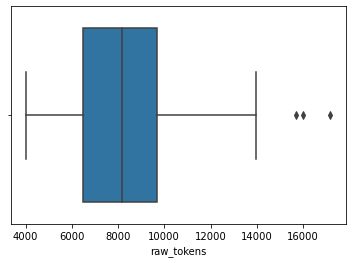

In [17]:
sns.boxplot(df_analysis['raw_tokens'])

In [18]:
# cleaning transcripts
#keep in mind that some transcripts contain comma with no space like 'hi,how are you' or " instead of ' like 'you"re'. after cleaning they, the trancsripts become useless
from cleaning import clean_transcripts

round1 = lambda x: clean_transcripts(x)
df_analysis['transcripts'] = df_analysis['transcripts'].apply(round1)

/Applications/anaconda3/envs/scrapping/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
# df_series_clean_except_transcripts.groupby('series_titles').count()
df_analysis = df_analysis.assign(tokens=df_analysis['transcripts'].apply(lambda x:len(x.split())))

In [20]:
#the difference between tokens_raw and tokens shouldn't be so much since only speaker's name,
#words within parentheses and squarebrackets were removed
print('Min Raw: ' + str(df_analysis['raw_tokens'].min()) + ', Min Clean: '+ str(df_analysis['tokens'].min()))
# #and only contractions were added "'n" --> 'not'
print('Max Raw: ' + str(df_analysis['raw_tokens'].max()) + ', Max Clean: '+ str(df_analysis['tokens'].max()))

Min Raw: 4016, Min Clean: 3783
Max Raw: 17180, Max Clean: 16232


/Applications/anaconda3/envs/scrapping/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


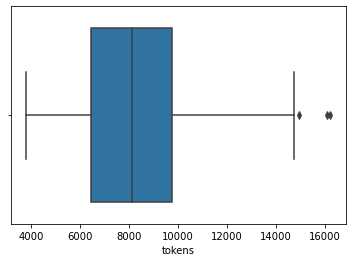

In [21]:
sns.boxplot(df_analysis['tokens'])

In [22]:
df_analysis.reset_index(drop=True, inplace=True)
# df_analysis.loc[265, 'transcripts']

# EDA

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 
import scipy.sparse
cv = CountVectorizer()#only misleading words excluded for the analysis
cv_matrix = cv.fit_transform(df_analysis['transcripts'])
df_dtm = pd.DataFrame.sparse.from_spmatrix(cv_matrix, index=df_analysis.index,
                                           columns=cv.get_feature_names())

In [24]:
df_dtm = df_dtm.T

# Formula

In [25]:
def get_frames(indices, dtm, thousand_level=None): #, thousand_level ['4'], ['5-14']
    """1. The df_dtm gives the number of times a word (all_forms) shows up in an episode/movie
       2. Then its joined to get the level and base_forms of each word
       3. The final df has the words counted for each episode so it can be seen base_forms repetition in the final df"""
    frames = []
    for index in indices:
        df_count_words = dtm[[index]].loc[dtm[index]!=0]
        df_count_words = df_count_words.reset_index()
        df_count_words.rename(columns={"index": "all_forms", index: "count"}, inplace=True)

        df_count_words_level = pd.merge(df_count_words, df_nation[['base_forms', 'all_forms',
                                'levels_frequency', 'levels', 'levels_coverage']], how='left', on='all_forms', indicator=True)
        df_count_words_level.loc[df_count_words_level['_merge']=='left_only', 'levels_coverage'] = 100
        if thousand_level is not None: #only consider words in specific levels
            df_count_words_level = df_count_words_level[df_count_words_level['levels_frequency'].isin(thousand_level)]
        frames.append(df_count_words_level)
    df_count_words_level = pd.concat(frames)
    return df_count_words_level

In [26]:
def get_coverage(indices, df_dtm):
    frames = []
    for episode_index in indices:
        df_coverage_episode = get_frames([episode_index], df_dtm) ##
        df_coverage_episode = df_coverage_episode[['count' ,'levels_coverage']].groupby('levels_coverage').sum()
        df_coverage_episode.drop([28, 29], axis=0, inplace=True, errors='ignore')
        df_coverage_episode['%'] = 100 * (round(df_coverage_episode['count']/
                                            df_coverage_episode['count'].sum(), 4))
        df_coverage_episode = df_coverage_episode.reset_index()
        condition = [(df_coverage_episode['levels_coverage']<=4),
            (df_coverage_episode['levels_coverage']>=5) & (df_coverage_episode['levels_coverage']<=15),
                    (df_coverage_episode['levels_coverage']>=26)] #15 includes list from 15 to 25
        values = [df_coverage_episode['levels_coverage'], 5, df_coverage_episode['levels_coverage']]
        df_coverage_episode['lvl'] = np.select(condition, values)
        df_coverage_episode = df_coverage_episode.groupby('lvl').sum()
        df_coverage_episode['cumulative'] = df_coverage_episode['%'].cumsum()
        if len(indices)==1:   
            df_coverage_episode = df_coverage_episode[['count', '%']].T.reset_index(drop=True)
        elif len(indices)>1:
            df_coverage_episode = df_coverage_episode[['%']].T.reset_index(drop=True)
            df_coverage_episode['index'] = episode_index
        frames.append(df_coverage_episode)
    return frames

### Unique words in the TV show

In [27]:
df_unique_words = get_frames(df_analysis.index.values, df_dtm)
df_unique_words = df_unique_words[['all_forms', 'count', 'levels_coverage']]
df_unique_words = df_unique_words[df_unique_words['levels_coverage']==100]
df_unique_words

#check .groupby sparse(int64)
list_words = list(df_unique_words['all_forms'])
list_count = list(df_unique_words['count'])

In [28]:
df_unique_words.sort_values('count', ascending=False)[:10]

,all_forms,count,levels_coverage
1306,âª,385,100.0
1668,уou,198,100.0
630,gailey,127,100.0
1324,âª,113,100.0
1313,tycho,107,100.0
767,phiona,84,100.0
484,mowgli,81,100.0
1103,winn,76,100.0
1268,uma,74,100.0
431,flik,72,100.0


### Vocabulary coverage in all episodes

In [29]:
frames = get_coverage(df_analysis.index.values, df_dtm)

In [170]:
df_statistics = pd.concat(frames, axis=0, ignore_index=True)[['index', 1, 2, 3, 4, 5, 26, 27, 100]]
df_statistics = df_statistics.fillna(0)
#assume you know interjections, character names and words created in the tv series
df_statistics['Lvl 1'] = df_statistics[1] + df_statistics[26] + df_statistics[27] + df_statistics[100]
df_statistics['Lvl 1+2'] = df_statistics['Lvl 1'] + df_statistics[2]
df_statistics['Lvl 1+2+3'] = df_statistics['Lvl 1+2'] + df_statistics[3]
df_statistics['Lvl 1+2+3+4'] = df_statistics['Lvl 1+2+3'] + df_statistics[4]
df_statistics = pd.concat((df_statistics.set_index('index'), df_analysis[['titles', 'years', 'genre', 'imdb_votes']]), axis=1)
df_statistics = df_statistics.sort_values('Lvl 1', ascending=False)
#rule of thum % in list 100 <3.5
df_statistics = df_statistics[df_statistics[100]<4.5]
df_statistics

,1.0,2.0,3.0,4.0,5.0,26.0,27.0,100.0,Lvl 1,Lvl 1+2,Lvl 1+2+3,Lvl 1+2+3+4,titles,years,genre,imdb_votes
220,91.77,2.33,0.47,0.58,1.64,2.12,0.42,0.69,95.00,97.33,97.80,98.38,the last song,2010,"Drama, Music, Romance","78,380"
148,91.22,3.80,0.32,0.59,0.55,3.11,0.14,0.27,94.74,98.54,98.86,99.45,petes dragon,2016,"Action, Adventure, Comedy, Drama, Family, Fantasy","52,020"
162,87.40,3.69,0.23,0.50,1.42,4.72,0.84,1.20,94.16,97.85,98.08,98.58,one magic christmas,1985,"Family, Fantasy","2,977"
215,90.00,3.24,0.62,0.53,1.44,2.60,1.40,0.16,94.16,97.40,98.02,98.55,starstruck,2010,"Comedy, Family, Music, Romance","12,305"
252,87.92,3.25,0.66,0.86,1.12,2.92,2.13,1.14,94.11,97.36,98.02,98.88,jump in,2007,"Comedy, Drama, Family, Romance, Sport","6,574"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,79.07,7.08,1.54,2.77,6.26,1.75,0.09,1.45,82.36,89.44,90.98,93.75,melody time,1948,"Animation, Comedy, Family, Musical","4,534"
111,77.54,6.86,2.25,1.50,7.79,2.75,0.07,1.25,81.61,88.47,90.72,92.22,the adventures of ichabod and mr toad,1949,"Animation, Comedy, Family, Fantasy, Horror","11,917"
50,77.43,7.10,4.62,1.88,7.04,0.00,0.43,1.51,79.37,86.47,91.09,92.97,dolphin reef,2020,"Documentary, Family",566
80,77.36,9.00,3.12,2.91,6.69,0.64,0.00,0.27,78.27,87.27,90.39,93.30,the african lion,1955,"Family, Documentary",286


In [31]:
# df_statistics[df_statistics['titles'].str.contains('toy story')]
# df_analysis.loc[271, 'transcripts']

### Scatter Plot

In [139]:
#preparing data
df_statistics = df_statistics.sort_values('Lvl 1', ascending=False)
df_1 = df_statistics[['Lvl 1', 'titles', 'years', 'genre']]
df_1 = df_1.assign(label = 'Lvl 1')
df_1.rename(columns={'Lvl 1':'lvl'}, inplace=True)
df_2 = df_statistics[['Lvl 1+2', 'titles', 'years', 'genre']]
df_2 = df_2.assign(label = 'Lvl 1+2')
df_2.rename(columns={'Lvl 1+2':'lvl'}, inplace=True)
df_3 = df_statistics[['Lvl 1+2+3', 'titles', 'years', 'genre']]
df_3 = df_3.assign(label = 'Lvl 1+2+3')
df_3.rename(columns={'Lvl 1+2+3':'lvl'}, inplace=True)
# df_4 = df_statistics[['Lvl 1+2+3+4', 'season_episode_names']]
# df_4 = df_4.assign(label = 'Lvl 1+2+3+4')
# df_4.rename(columns={'Lvl 1+2+3+4':'lvl'}, inplace=True)

# df_dot = pd.concat([df_1, df_2, df_3]) #if coverage is too different between episodes filter out df_2 (lvl1+2)
df_dot = pd.concat([df_1, df_2, df_3]) #if coverage is too different between episodes filter out df_2 (lvl1+2)
df_dot['lvl'] = df_dot['lvl'].apply(lambda x:round(x,1))
df_dot.reset_index(drop=True, inplace=True)

In [140]:
#adding ranking column
rank = df_dot.index.values
df_dot['rank'] = rank+1
df_dot.loc[df_dot['rank']>len(df_statistics), 'rank']='-'
df_dot

,lvl,titles,years,genre,label,rank
0,95.0,the last song,2010,"Drama, Music, Romance",Lvl 1,1
1,94.7,petes dragon,2016,"Action, Adventure, Comedy, Drama, Family, Fantasy",Lvl 1,2
2,94.2,one magic christmas,1985,"Family, Fantasy",Lvl 1,3
3,94.2,starstruck,2010,"Comedy, Family, Music, Romance",Lvl 1,4
4,94.1,jump in,2007,"Comedy, Drama, Family, Romance, Sport",Lvl 1,5
...,...,...,...,...,...,...
820,91.0,melody time,1948,"Animation, Comedy, Family, Musical",Lvl 1+2+3,-
821,90.7,the adventures of ichabod and mr toad,1949,"Animation, Comedy, Family, Fantasy, Horror",Lvl 1+2+3,-
822,91.1,dolphin reef,2020,"Documentary, Family",Lvl 1+2+3,-
823,90.4,the african lion,1955,"Family, Documentary",Lvl 1+2+3,-


In [34]:
movie_count = []

for index, percentage in enumerate(df_dot['lvl']):
    subset = df_dot.iloc[:index+1]    # Create subset starting at the beginning of dataset until the episode
    count = len(subset[subset['lvl'] == percentage])   # Count all episode with same % in this subset
    movie_count.append(count)
    
df_dot['count'] = movie_count

In [35]:
df_dot['titles'] = df_dot['titles'].apply(lambda x:re.sub(',', '', x))

In [39]:
df_dot = df_dot[['lvl', 'titles', 'label', 'rank', 'count', 'years', 'genre']]

In [143]:
# data for DataWrapper
# for i in df_dot.values:
#     print(i[1].title() + ' , ' + i[2] + ' , ' + str(i[3]) + ' , ' + str(i[4]) + ' , ' + str(i[0])
#          + ', ' + i[5])

In [142]:
# for i in df_dot.values:
#     print(i[6])

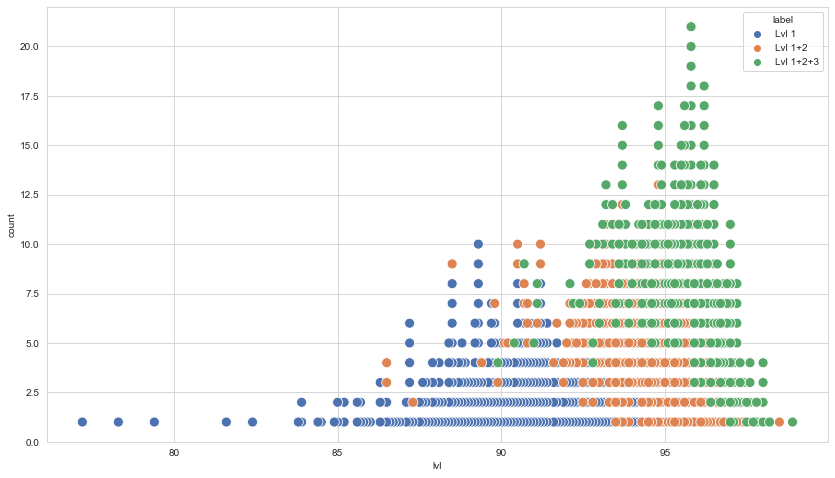

In [37]:
#Static plot
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14, 8))
ax = sns.scatterplot(x='lvl', y='count', data=df_dot,
             hue='label', s=100, ax=ax, palette="deep")

### Best Movies

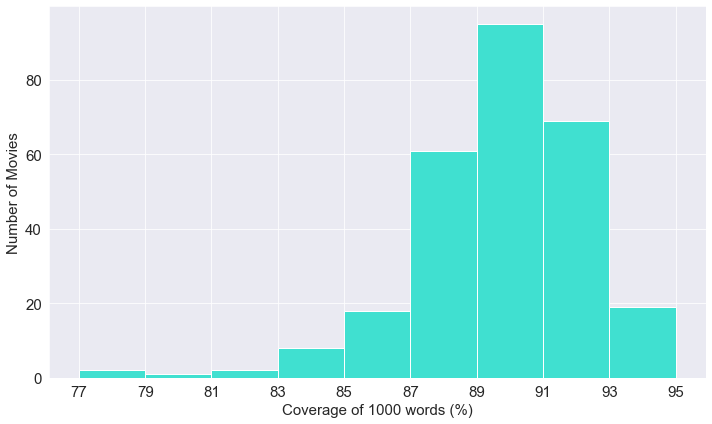

In [169]:
sns.set_style("darkgrid")

min_coverage, max_coverage = df_statistics['Lvl 1'].min(), df_statistics['Lvl 1'].max()
minbin, maxbin = math.floor(min_coverage), math.ceil(max_coverage)
gap = maxbin - minbin
#choose number of beens
bins = 10
width = math.ceil(gap/bins)

bins = np.arange(minbin,maxbin+width, width)
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.hist(df_statistics['Lvl 1'], bins=bins, color='turquoise')

fig.set_size_inches(10, 6)
ax.set_xlabel('Coverage of 1000 words (%)', fontsize=15)
ax.set_ylabel('Number of Movies', fontsize=15)
plt.xticks(bins, fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
plt.show()
fig.savefig('histogram_1.png')

In [174]:
#top popular movies in the top 20
df_best = df_statistics[:20]
df_best['imdb_votes'] = df_best['imdb_votes'].apply(lambda x:''.join(x.split(',')))
df_best = df_best.astype({'imdb_votes':int})
df_best.sort_values('imdb_votes', ascending=False)[:10]

/Applications/anaconda3/envs/scrapping/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,1.0,2.0,3.0,4.0,5.0,26.0,27.0,100.0,Lvl 1,Lvl 1+2,Lvl 1+2+3,Lvl 1+2+3+4,titles,years,genre,imdb_votes
173,88.14,3.10,0.53,0.50,2.55,2.45,1.69,1.03,93.31,96.41,96.94,97.44,the parent trap,1998,"Adventure, Comedy, Drama, Family, Romance",114898
119,88.16,3.85,0.83,0.95,1.34,1.75,1.42,1.73,93.06,96.91,97.74,98.69,frozen ii,2019,"Animation, Adventure, Comedy, Family, Fantasy,...",106368
136,89.85,3.48,0.55,0.80,1.97,0.74,0.57,2.05,93.21,96.69,97.24,98.04,brother bear,2003,"Animation, Adventure, Comedy, Family, Fantasy",92453
220,91.77,2.33,0.47,0.58,1.64,2.12,0.42,0.69,95.00,97.33,97.80,98.38,the last song,2010,"Drama, Music, Romance",78380
25,85.62,3.41,0.62,0.48,2.45,3.25,2.62,1.59,93.08,96.49,97.11,97.59,the straight story,1999,"Biography, Drama",77452
85,87.81,3.64,0.63,0.68,2.10,3.14,1.23,0.79,92.97,96.61,97.24,97.92,eight below,2006,"Adventure, Drama, Family",58850
270,90.14,3.05,0.85,0.74,1.92,2.08,0.57,0.63,93.42,96.47,97.32,98.06,high school musical 3,2008,"Comedy, Drama, Family, Music, Musical, Romance",55628
148,91.22,3.80,0.32,0.59,0.55,3.11,0.14,0.27,94.74,98.54,98.86,99.45,petes dragon,2016,"Action, Adventure, Comedy, Drama, Family, Fantasy",52020
277,87.89,3.16,1.69,0.74,1.30,3.51,0.98,0.77,93.15,96.31,98.00,98.74,a wrinkle in time,2018,"Adventure, Family, Fantasy, Sci-Fi",38659
274,88.09,3.30,1.06,0.82,1.63,3.20,1.28,0.65,93.22,96.52,97.58,98.40,confessions of a teenage drama queen,2004,"Comedy, Family, Music, Romance",26686
